In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/datc/opschaler/combined_gas_smart_weather_dfs/processed/P01S01W8655_hour.csv",header=0,delimiter="\t",parse_dates = ['datetime'])
df = df.set_index(['datetime'])
df12h = df.resample('12H').mean()
df1day = df.resample('1D').mean()
df1week = df.resample('1W').mean()
df1month = df.resample('1M').mean()

In [13]:
df.head()

,eMeter,eMeterReturn,eMeterLow,eMeterLowReturn,ePower,ePowerReturn,gasMeter,gasPower,DD,DR,...,P,Q,RG,SQ,T,T10,TD,U,VV,WW
datetime,,,,,,,,,,,,,,,,,,,,,
2017-04-24 12:00:00,777.974426,0.0,736.960999,0.0,153.765366,0.0,1591.657959,0.031982,255.050001,44.0,...,1014.933329,444.500000,0.0,1.276400,12.450000,13.983333,7.000000,68.833333,29966.666667,10.833333
2017-04-24 13:00:00,778.140198,0.0,736.960999,0.0,148.486038,0.0,1591.657959,0.000000,252.866666,58.0,...,1014.183339,410.333333,0.0,0.513033,12.766667,13.850000,6.533333,65.333333,36050.000000,32.666667
2017-04-24 14:00:00,778.333679,0.0,736.960999,0.0,214.163376,0.0,1591.657959,0.000000,259.849996,0.0,...,1013.616669,449.166667,0.0,1.507850,12.800000,14.266667,6.483333,65.000000,40366.666667,5.500000
2017-04-24 15:00:00,778.493530,0.0,736.960999,0.0,151.117645,0.0,1591.657959,0.000000,263.516665,0.0,...,1012.966665,356.000000,0.0,0.000000,12.400000,13.633334,6.600000,67.333333,34000.000000,2.000000
2017-04-24 16:00:00,778.654724,0.0,736.960999,0.0,180.759781,0.0,1591.657959,0.000000,252.883331,0.0,...,1012.083344,254.666667,0.0,0.130250,12.150000,13.033333,6.416667,67.333333,35150.000000,2.000000


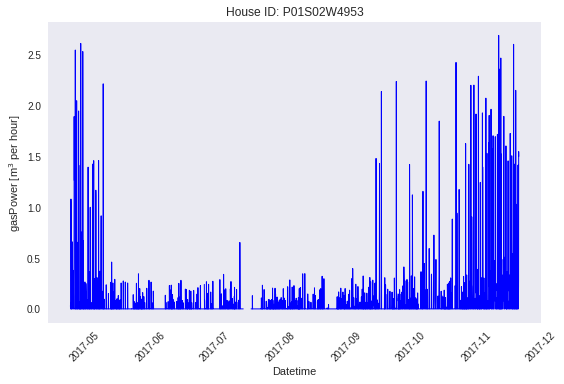

In [16]:
plt.title('House ID: P01S02W4953')

plt.plot(df.index[:], df['gasPower'][:], '-', color='b', linewidth=1)
plt.xlabel('Datetime')
plt.ylabel('gasPower [m$^3$ per hour]')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
# plt.savefig('sample1.png', dpi=500)

plt.show()

In [6]:
corr = df.corr()
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(25,25))

sns.heatmap(corr, mask=mask, square=False, cmap='RdYlGn', annot=True, ax=ax,
            cbar_kws={'label':'Pearson correlation coefficient [-]'})

plt.title('Correlation Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.savefig('sample.png', dpi=500)
plt.show()


,eMeter,eMeterReturn,eMeterLow,eMeterLowReturn,ePower,ePowerReturn,gasMeter,gasPower,DD,DR,...,P,Q,RG,SQ,T,T10,TD,U,VV,WW
datetime,,,,,,,,,,,,,,,,,,,,,
2017-04-24 12:00:00,780.126180,0.0,736.970327,0.0,425.912710,0.0,1592.684835,0.187256,266.836111,142.333333,...,1011.254166,184.347222,0.320833,0.308364,10.955556,11.359722,6.690278,75.138889,29418.194444,28.125000
2017-04-25 00:00:00,783.060130,0.0,738.004186,0.0,199.364787,0.0,1594.604543,0.193075,282.701250,76.500000,...,1007.390141,111.173611,0.152083,2.087033,5.940278,5.270417,2.563333,78.562500,35672.083333,34.891667
2017-04-25 12:00:00,786.536982,0.0,738.371852,0.0,532.000355,0.0,1596.558828,0.107168,288.659722,18.333333,...,1010.791669,341.263889,0.008333,5.922788,7.066667,7.476389,1.391667,67.250000,36565.277778,12.208333
2017-04-26 00:00:00,790.381317,0.0,739.494878,0.0,188.629803,0.0,1599.501617,0.395605,211.529307,78.000000,...,1011.573889,123.527778,0.205972,2.604058,4.342361,3.816389,2.493611,87.805556,33324.055556,20.427778
2017-04-26 12:00:00,793.318807,0.0,739.938497,0.0,538.254679,0.0,1603.202657,0.359172,311.109723,0.000000,...,1014.816672,329.555556,0.000000,5.576768,7.795833,7.830556,1.809722,66.013889,36825.000000,2.513889


In [ ]:
results = []
for i in range(len(df/24)):
    corr = df[(i*24+0):(i*24+24)].corr()
    results.append(corr[['gasPower']])

for d in range(len(results)):
    results[d] = results[d].T
    
frames = (results[:])
resultaat = pd.concat(frames)